In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sugar import extract_idr_data as extract
from sugar import compute_sugar_parameter as csp
import builtins_SNF as Build_SNF
import sugar_generator as sts
import sncosmo_fit_SNF as SFS
from scipy import integrate
import cPickle as pkl

In [3]:
parameters = np.array([1. ,1. ,1., 0.1, 39.])

In [4]:
def flbda2fnu( x, y, var=None, backward=False):
    """Convert *x* [A], *y* [erg/s/cm2/A] to *y* [erg/s/cm2/Hz]. Se
    `var=var(y)` to get variance."""

    f = x**2 / 299792458. * 1.e-10 # Conversion factor                                                                                                                      
    if backward: 
        f = 1./f   
    if var is None:                # Return converted signa
        return y * f
    else:                          # Return converted variance
        return var * f**2

def flbda2ABmag( x, y, ABmag0=48.59, var=None):
    """Convert *x* [A], *y* [erg/s/cm2/A] to `ABmag =                                                                                                                       
    -2.5*log10(erg/s/cm2/Hz) - ABmag0`. Set `var=var(y)` to get                                                                                                             
    variance."""          
    z = flbda2fnu(x,y)
    if var is None:
        return -2.5*np.log10(z) - ABmag0 
    else:
        return (2.5/np.log(10)/z)**2 * flbda2fnu(x,y,var=var)

In [5]:
ss = sts.sugar_spectrum()
ss._parameters = parameters
ss._phase = np.array([-10.06878412,  -8.05520043,  -8.04228848,  -8.03005611,  -5.12622786,
  -5.11331592,  -5.10108355,  -3.18332007,  -0.20405888,  -0.18774906,
   1.74904254,  4.62772648,   6.59034197,   9.52746945,  11.48668706,
  14.4306103,   16.39594409,  19.31268429,  21.28753215,  24.21582514,
  26.14378225,  31.05915547,  33.97453652,  37.87054573])

In [6]:
data_phot = ss.AstropyTable_flux(error=False)

In [7]:
print data_phot
ss.fit_lc_sugar(data_phot)

    time        band          flux       fluxerr       zp         zpsys   
------------ --------- ----------------- ------- ------------- -----------
-10.06878412 new_fI_10  0.00387697268651   1e-11 14.5598699276 vega_snf_10
-10.06878412     fB_10  0.00580160919787   1e-11 15.3139259152 vega_snf_10
-10.06878412     fV_10  0.00481237123844   1e-11 14.9931961734 vega_snf_10
-10.06878412     fR_10  0.00469337635382   1e-11 14.7681575147 vega_snf_10
-10.06878412     fU_10  0.00473388424053   1e-11 14.6340814575 vega_snf_10
 -8.05520043 new_fI_10  0.00475229969582   1e-11 14.5598699276 vega_snf_10
 -8.05520043     fB_10  0.00745735611037   1e-11 15.3139259152 vega_snf_10
 -8.05520043     fV_10  0.00616619607641   1e-11 14.9931961734 vega_snf_10
 -8.05520043     fR_10  0.00594291488692   1e-11 14.7681575147 vega_snf_10
 -8.05520043     fU_10  0.00608473295662   1e-11 14.6340814575 vega_snf_10
         ...       ...               ...     ...           ...         ...
 31.05915547     fU_10 0.

In [8]:
spec_mag = []
spec_mag_err = []
print ss._phase
for p in (ss._phase):
    spec_mag_p = flbda2ABmag(ss._wave, ss.model_spectrum_flux_m0(p, ss._wave)[0])  
    spec_mag_p_err = np.ones_like(spec_mag_p)*0.000000000000001
    spec_mag += list(spec_mag_p)
    spec_mag_err += list(spec_mag_p_err)
spec_mag = np.array(spec_mag)
spec_mag_err = np.array(spec_mag_err)

print len(spec_mag), len(spec_mag_err)

[-10.06878412  -8.05520043  -8.04228848  -8.03005611  -5.12622786
  -5.11331592  -5.10108355  -3.18332007  -0.20405888  -0.18774906
   1.74904254   4.62772648   6.59034197   9.52746945  11.48668706
  14.4306103   16.39594409  19.31268429  21.28753215  24.21582514
  26.14378225  31.05915547  33.97453652  37.87054573]
4728 4728


In [20]:
dic_sed = pkl.load(open('../sugar_model/sugar_model.pkl'))
SPECTRA = '../sugar_analysis_data/spectra_snia_v2.pkl'
HH = []
dic = {}
SN = ['SNF20080514-002']
reorder = np.arange(197*21).reshape(21, 197).T.reshape(-1)

ASED= csp.aligne_SED(SPECTRA,SNN,dic_sed['alpha'],dic_sed['m0'],2.5792515484625764)

ASED.align_SED()
print ASED.SED , spec_mag

GF=csp.global_fit(spec_mag,ASED.SED,dY=spec_mag_err,CovY=None)
GF.compute_h()


#print GF.h
HH.append(GF.h)
A=np.array(HH)
h=A[0]
cov_h=GF.cov_h
print h


[[ -1.73696737e+01   1.00000000e+00   1.84974773e+00   1.86554265e-01
   -1.16908862e-02   4.75235229e-02]
 [ -1.74205255e+01   1.00000000e+00   1.83837422e+00   1.86238349e-01
   -1.15888252e-02   8.59205518e-02]
 [ -1.74850182e+01   1.00000000e+00   1.82745128e+00   2.15430417e-01
    1.20261875e-02   1.09439889e-01]
 ..., 
 [ -1.76786806e+01   1.00000000e+00   4.82017458e-01   1.33717627e-01
   -1.05569972e-02  -2.16274012e-01]
 [ -1.77133397e+01   1.00000000e+00   4.76961479e-01   1.19208124e-01
   -2.13304515e-02  -2.32577732e-01]
 [ -1.77715440e+01   1.00000000e+00   4.72033467e-01   1.15704997e-01
   -2.10576595e-02  -2.24692035e-01]] [ 22.04674158  22.03144736  22.04185724 ...,  21.27417715  21.19742089
  21.14779758]
[[ 39.00095142   0.10067824   0.99392367   1.01224428   0.9975441 ]]


In [9]:
print ASED.Phase

[-10.06878412  -8.05520043  -8.04228848  -8.03005611  -5.12622786
  -5.11331592  -5.10108355  -3.18332007  -0.20405888  -0.18774906
   1.74904254   4.62772648   6.59034197   9.52746945  11.48668706
  14.4306103   16.39594409  19.31268429  21.28753215  24.21582514
  26.14378225  31.05915547  33.97453652  37.87054573]


In [10]:
m0 = np.loadtxt('../sugar_model/sugar_template_0.dat')

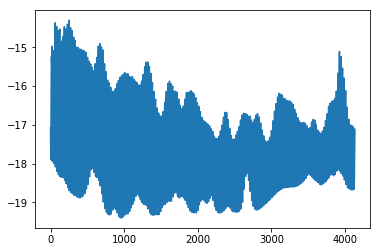

In [11]:
reorder = np.arange(197*21).reshape(21, 197).T.reshape(-1)

plt.plot(m0[:,2][reorder])
plt.show()

[-17.07748 -17.51751 -17.8243  ..., -17.49115 -17.30622 -17.10976]


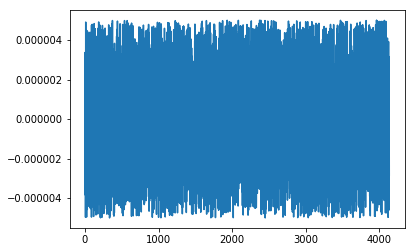

In [16]:

plt.plot(m0[:,2][reorder] - ASED.M0)
plt.show()

In [10]:
ASED.Rv

2.6